<a href="https://colab.research.google.com/github/Gabomatius/MD_Anime/blob/Agrupaci%C3%B3n/Algoritmos_de_Agrupaci%C3%B3n.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1> <strong> <center> Algoritmos de agrupamiento </center> </strong> </h1>
Este texto presenta el desarrollo e implementación de algunos algoritmos de agrupación, principalmente en la implementación del <strong> kmeans </strong> y <strong> DBScan </strong>. También se implementarán algunas métricas para determinar qué tan buenos son estos algoritmos.

In [3]:
import sys
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans, DBSCAN
from sklearn import metrics
from sklearn.decomposition import PCA
import matplotlib.colors as mcolors
from scipy.cluster import hierarchy
sys.setrecursionlimit(500000)
from sklearn.metrics import silhouette_score, davies_bouldin_score, precision_score, recall_score, f1_score


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
data=pd.read_csv("/content/drive/Shareddrives/Mineria de datos/anime.csv")
data_1=pd.read_csv("/content/drive/Shareddrives/Mineria de datos/Row_data.csv", sep = ";")
data_2=pd.read_csv("/content/drive/Shareddrives/Mineria de datos/Col_data_Imputed.csv", sep = ";")

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (69,70) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


Después de cargar los datos, se utiliza el PCA, ya que se cuentan con muchas variables.

In [5]:
pca = PCA(n_components = 8)
data_2_num = data_2.loc[:,data_2.columns[~(data_2.dtypes=="object")]].fillna(0)
data_2_PCA = pca.fit_transform(data_2_num)

In [6]:
Error = []
for i in range(2,40):
  kmeans = KMeans(n_clusters = i)
  kmeans.fit_predict(data_2_PCA)
  Error.append(kmeans.inertia_)

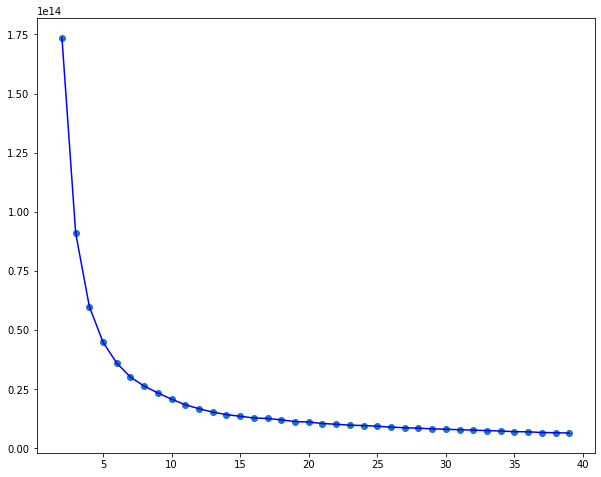

In [7]:
fig = plt.figure(figsize = (10,8))

plt.scatter(list(range(2,40)), Error)
plt.plot(list(range(2,40)), Error, "b-")

In [8]:
kmeans_1 = KMeans(n_clusters = 5)
Res_1 = kmeans_1.fit_predict(data_2_PCA)
kmeans_2 = KMeans(n_clusters = 10)
Res_2 = kmeans_2.fit_predict(data_2_PCA)
kmeans_3 = KMeans(n_clusters = 15)
Res_3 = kmeans_3.fit_predict(data_2_PCA)
kmeans_4 = KMeans(n_clusters = 20)
Res_4 = kmeans_4.fit_predict(data_2_PCA)

In [9]:
#MEDIDAS DE VALIDACIÓN
print(f'Silhouette Score(n=5): {silhouette_score(data_2_PCA,Res_1)}')
print(f'davies bouldin score(n=5): {davies_bouldin_score(data_2_PCA,Res_1)}')
print(f'Silhouette Score(n=10): {silhouette_score(data_2_PCA,Res_2)}')
print(f'davies bouldin score(n=10): {davies_bouldin_score(data_2_PCA,Res_2)}')
print(f'Silhouette Score(n=15): {silhouette_score(data_2_PCA,Res_3)}')
print(f'davies bouldin score(n=15): {davies_bouldin_score(data_2_PCA,Res_3)}')
print(f'Silhouette Score(n=20): {silhouette_score(data_2_PCA,Res_4)}')
print(f'davies bouldin score(n=20): {davies_bouldin_score(data_2_PCA,Res_4)}')

Silhouette Score(n=5): 0.7998578743385665
davies bouldin score(n=5): 0.6279007116185953
Silhouette Score(n=10): 0.5070435595730693
davies bouldin score(n=10): 0.7579650518757562
Silhouette Score(n=15): 0.5164886791798157
davies bouldin score(n=15): 0.8662977231468418
Silhouette Score(n=20): 0.46720832120488737
davies bouldin score(n=20): 0.8616697848794136


In [10]:
kmeans_5 = pd.DataFrame({"Score":data_2_num["Score"], "Favorites":data_2_num["Score-10"],"Pred": Res_1})
kmeans_10 = pd.DataFrame({"Score":data_2_num["Score"], "Favorites":data_2_num["Score-10"],"Pred": Res_2})
kmeans_15 = pd.DataFrame({"Score":data_2_num["Score"], "Favorites":data_2_num["Score-10"],"Pred": Res_3})
kmeans_20 = pd.DataFrame({"Score":data_2_num["Score"], "Favorites":data_2_num["Score-10"],"Pred": Res_4})

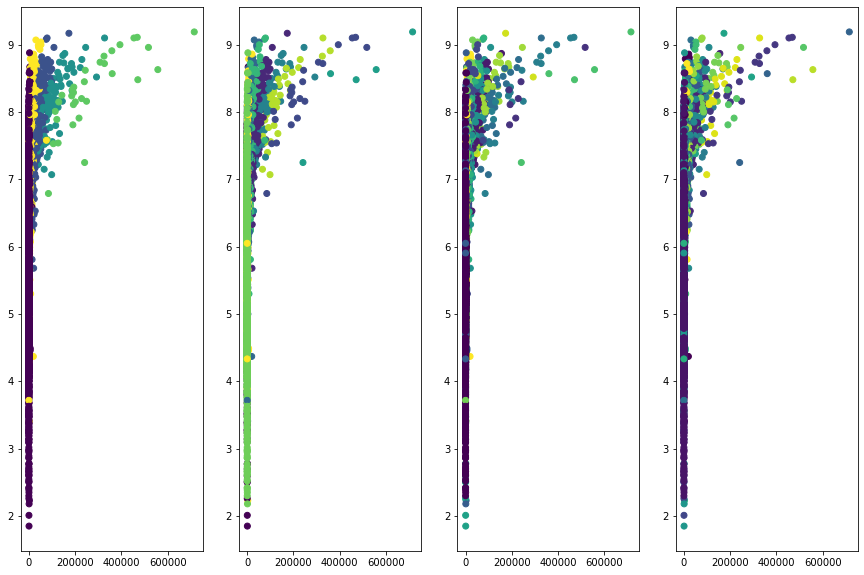

In [ ]:
fig, ax = plt.subplots(1,4)
fig.set_figheight(10)
fig.set_figwidth(15)

ax[0].scatter(kmeans_5["Favorites"], kmeans_5["Score"], c = kmeans_5["Pred"])
ax[1].scatter(kmeans_10["Favorites"], kmeans_10["Score"], c = kmeans_10["Pred"])
ax[2].scatter(kmeans_15["Favorites"], kmeans_15["Score"], c = kmeans_15["Pred"])
ax[3].scatter(kmeans_20["Favorites"], kmeans_20["Score"], c = kmeans_20["Pred"])

Text(0.5, 1.0, 'Kmeans=20\nC1 vs C3')

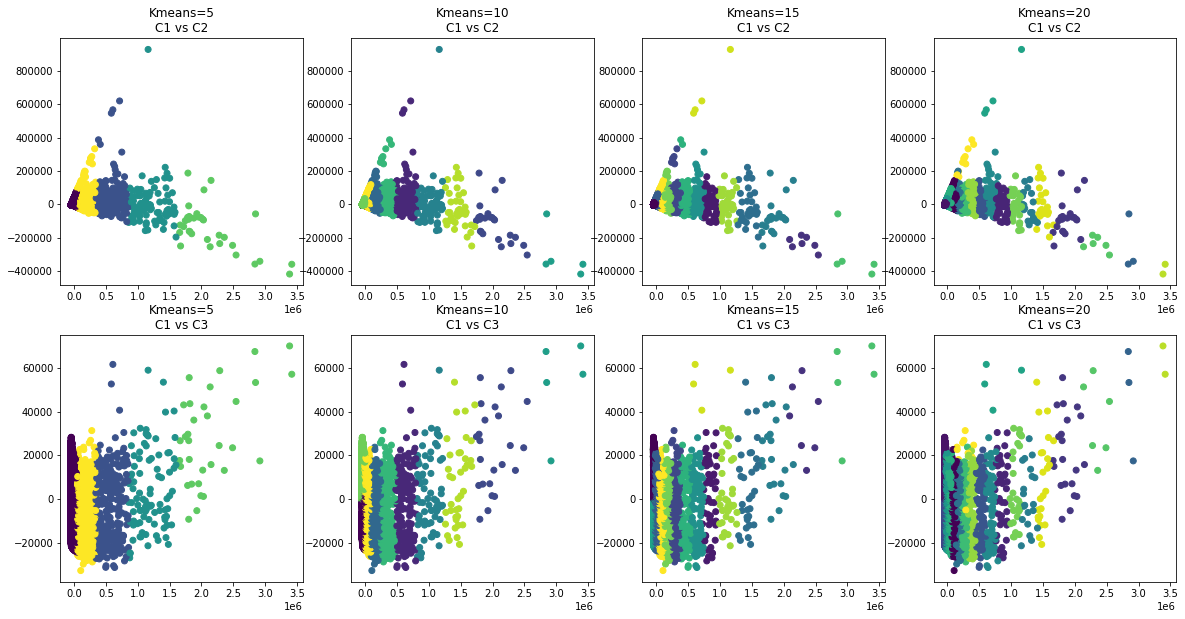

In [ ]:
fig, ax = plt.subplots(2,4)
fig.set_figheight(10)
fig.set_figwidth(20)


ax[0,0].scatter(pd.DataFrame(data_2_PCA.tolist()).iloc[:,0], pd.DataFrame(data_2_PCA.tolist()).iloc[:,1], c = kmeans_5["Pred"])
ax[0,0].set_title("Kmeans=5\nC1 vs C2")
ax[0,1].scatter(pd.DataFrame(data_2_PCA.tolist()).iloc[:,0], pd.DataFrame(data_2_PCA.tolist()).iloc[:,1], c = kmeans_10["Pred"])
ax[0,1].set_title("Kmeans=10\nC1 vs C2")
ax[0,2].scatter(pd.DataFrame(data_2_PCA.tolist()).iloc[:,0], pd.DataFrame(data_2_PCA.tolist()).iloc[:,1], c = kmeans_15["Pred"])
ax[0,2].set_title("Kmeans=15\nC1 vs C2")
ax[0,3].scatter(pd.DataFrame(data_2_PCA.tolist()).iloc[:,0], pd.DataFrame(data_2_PCA.tolist()).iloc[:,1], c = kmeans_20["Pred"])
ax[0,3].set_title("Kmeans=20\nC1 vs C2")


ax[1,0].scatter(pd.DataFrame(data_2_PCA.tolist()).iloc[:,0], pd.DataFrame(data_2_PCA.tolist()).iloc[:,2], c = kmeans_5["Pred"])
ax[1,0].set_title("Kmeans=5\nC1 vs C3")
ax[1,1].scatter(pd.DataFrame(data_2_PCA.tolist()).iloc[:,0], pd.DataFrame(data_2_PCA.tolist()).iloc[:,2], c = kmeans_10["Pred"])
ax[1,1].set_title("Kmeans=10\nC1 vs C3")
ax[1,2].scatter(pd.DataFrame(data_2_PCA.tolist()).iloc[:,0], pd.DataFrame(data_2_PCA.tolist()).iloc[:,2], c = kmeans_15["Pred"])
ax[1,2].set_title("Kmeans=15\nC1 vs C3")
ax[1,3].scatter(pd.DataFrame(data_2_PCA.tolist()).iloc[:,0], pd.DataFrame(data_2_PCA.tolist()).iloc[:,2], c = kmeans_20["Pred"])
ax[1,3].set_title("Kmeans=20\nC1 vs C3")

In [11]:
db_1 = DBSCAN(eps=0.001, min_samples=100, metric ="correlation").fit(data_2_PCA)
np.unique(db_1.labels_)

array([-1,  0,  1])

In [12]:
db_3 = DBSCAN(eps=0.0005, min_samples=50, metric ="correlation").fit(data_2_PCA)
np.unique(db_3.labels_)

array([-1,  0,  1,  2,  3,  4])

In [13]:
pd.DataFrame(db_3.labels_, columns =["Colors"]).groupby("Colors").size()

Colors
-1    7471
 0    3810
 1    6140
 2      50
 3      65
 4      26
dtype: int64

In [14]:
db_2 = DBSCAN(eps=1000, min_samples=20).fit(data_2_num)
np.unique(db_2.labels_)

array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])

In [15]:
db_4 = DBSCAN(eps=50000, min_samples=20).fit(data_2_num)
np.unique(db_4.labels_)

array([-1,  0,  1])

In [18]:
print(f'Silhouette Score(DB caso 1): {silhouette_score(data_2_num,db_1.labels_)}')
print(f'Silhouette Score(DB caso 2): {silhouette_score(data_2_num,db_2.labels_)}')
print(f'Silhouette Score(DB caso 3): {silhouette_score(data_2_num,db_3.labels_)}')
print(f'Silhouette Score(DB caso 4): {silhouette_score(data_2_num,db_4.labels_)}')

Silhouette Score(DB caso 1): 0.19649459840667244
Silhouette Score(DB caso 2): -0.492451640929431
Silhouette Score(DB caso 3): -0.11162495139431308
Silhouette Score(DB caso 4): 0.8589629923732551


In [ ]:
pd.DataFrame(db_4.labels_, columns =["Colors"]).groupby("Colors").size()

Colors
-1    17562
dtype: int64

In [ ]:
colores1_ap =[]

colores = list(mcolors.XKCD_COLORS.values())
for i in range(len(db_1.labels_)):
  for j in range(len(np.unique(db_1.labels_))):
    if (db_1.labels_[i] == np.unique(db_1.labels_)[j]):
      colores1_ap.append(colores[j])

colores2_ap =[]
for i in range(len(db_2.labels_)):
  for j in range(len(np.unique(db_2.labels_))):
    if (db_2.labels_[i] == np.unique(db_2.labels_)[j]):
      colores2_ap.append(colores[j])

colores3_ap =[]
for i in range(len(db_3.labels_)):
  for j in range(len(np.unique(db_3.labels_))):
    if (db_3.labels_[i] == np.unique(db_3.labels_)[j]):
      colores3_ap.append(colores[j])

colores4_ap =[]
for i in range(len(db_4.labels_)):
  for j in range(len(np.unique(db_4.labels_))):
    if (db_4.labels_[i] == np.unique(db_4.labels_)[j]):
      colores4_ap.append(colores[j])

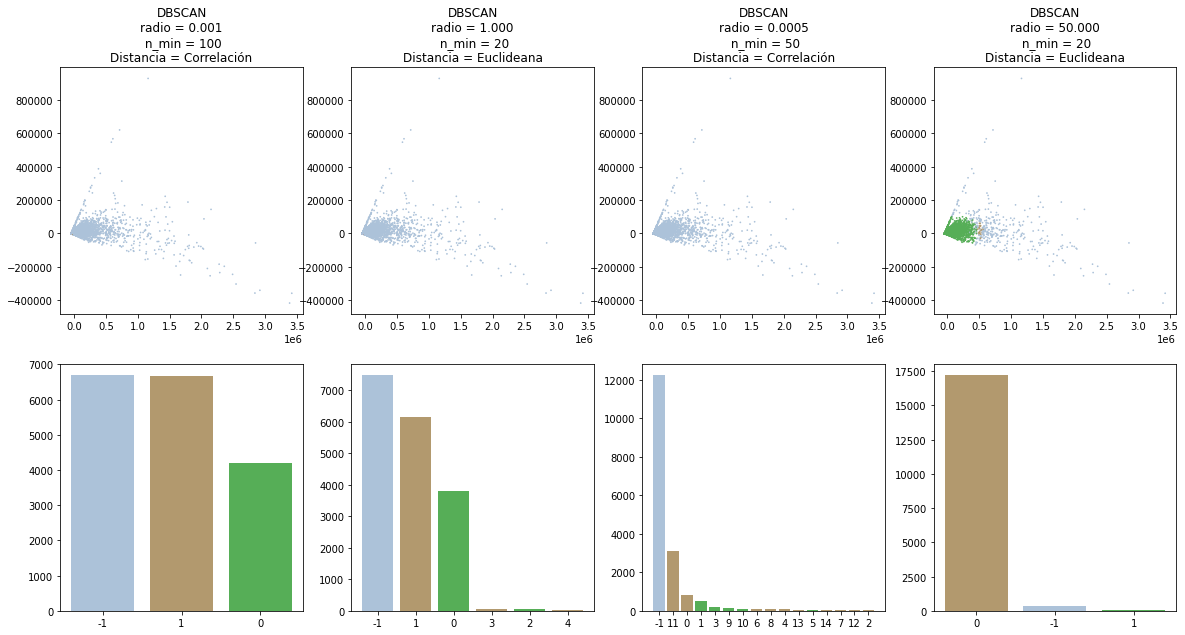

In [ ]:
fig, ax = plt.subplots(2,4)
fig.set_figheight(10)
fig.set_figwidth(20)

ax[0,0].scatter(pd.DataFrame(data_2_PCA.tolist()).iloc[:,0],pd.DataFrame(data_2_PCA.tolist()).iloc[:,1], c = colores1_ap, s=0.5)
ax[0,0].set_title("DBSCAN\nradio = 0.001\n n_min = 100\nDistancia = Correlación")
ax[0,2].scatter(pd.DataFrame(data_2_PCA.tolist()).iloc[:,0],pd.DataFrame(data_2_PCA.tolist()).iloc[:,1], c = colores2_ap, s=0.5)
ax[0,2].set_title("DBSCAN\nradio = 0.0005\n n_min = 50\nDistancia = Correlación")
ax[0,1].scatter(pd.DataFrame(data_2_PCA.tolist()).iloc[:,0],pd.DataFrame(data_2_PCA.tolist()).iloc[:,1], c = colores3_ap, s=0.5)
ax[0,1].set_title("DBSCAN\nradio = 1.000\n n_min = 20\nDistancia = Euclideana")
ax[0,3].scatter(pd.DataFrame(data_2_PCA.tolist()).iloc[:,0],pd.DataFrame(data_2_PCA.tolist()).iloc[:,1], c = colores4_ap, s=0.5)
ax[0,3].set_title("DBSCAN\nradio = 50.000\n n_min = 20\nDistancia = Euclideana")

ax[1,0].bar(pd.DataFrame(db_1.labels_.tolist(), columns = ["Labels"]).groupby("Labels").size().to_frame("n").reset_index().sort_values(by="n", ascending = False).astype({"Labels":str}).iloc[:,0],
            pd.DataFrame(db_1.labels_.tolist(), columns = ["Labels"]).groupby("Labels").size().to_frame("n").reset_index().sort_values(by="n", ascending = False).iloc[:,1],
            color = pd.DataFrame(db_1.labels_.tolist(), colores1_ap, columns = ["Labels"]).reset_index().groupby(["Labels","index"]).size().to_frame("n").reset_index().sort_values(by="n", ascending = False).astype({"Labels":str}).iloc[:,1])
ax[1,1].bar(pd.DataFrame(db_3.labels_.tolist(), columns = ["Labels"]).groupby("Labels").size().to_frame("n").reset_index().sort_values(by="n", ascending = False).astype({"Labels":str}).iloc[:,0],
            pd.DataFrame(db_3.labels_.tolist(), columns = ["Labels"]).groupby("Labels").size().to_frame("n").reset_index().sort_values(by="n", ascending = False).iloc[:,1],
            color = pd.DataFrame(db_3.labels_.tolist(), colores1_ap, columns = ["Labels"]).reset_index().groupby(["Labels","index"]).size().to_frame("n").reset_index().sort_values(by="n", ascending = False).astype({"Labels":str}).iloc[:,1])
ax[1,2].bar(pd.DataFrame(db_2.labels_.tolist(), columns = ["Labels"]).groupby("Labels").size().to_frame("n").reset_index().sort_values(by="n", ascending = False).astype({"Labels":str}).iloc[:,0],
            pd.DataFrame(db_2.labels_.tolist(), columns = ["Labels"]).groupby("Labels").size().to_frame("n").reset_index().sort_values(by="n", ascending = False).iloc[:,1],
            color = pd.DataFrame(db_2.labels_.tolist(), colores1_ap, columns = ["Labels"]).reset_index().groupby(["Labels","index"]).size().to_frame("n").reset_index().sort_values(by="n", ascending = False).astype({"Labels":str}).iloc[:,1])
ax[1,3].bar(pd.DataFrame(db_4.labels_.tolist(), columns = ["Labels"]).groupby("Labels").size().to_frame("n").reset_index().sort_values(by="n", ascending = False).astype({"Labels":str}).iloc[:,0],
            pd.DataFrame(db_4.labels_.tolist(), columns = ["Labels"]).groupby("Labels").size().to_frame("n").reset_index().sort_values(by="n", ascending = False).iloc[:,1],
            color = pd.DataFrame(db_4.labels_.tolist(), colores1_ap, columns = ["Labels"]).reset_index().groupby(["Labels","index"]).size().to_frame("n").reset_index().sort_values(by="n", ascending = False).astype({"Labels":str}).iloc[:,1])
plt.show()

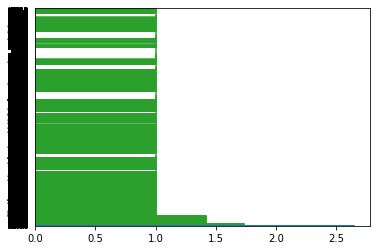

In [ ]:
#MIN
X=data_2.loc[:,['Genre Action','Genre Adventure','Genre Cars','Genre Comedy','Genre Dementia','Genre Demons','Genre Drama','Genre Ecchi','Genre Fantasy','Genre Game','Genre Harem','Genre Hentai','Genre Historical','Genre Horror','Genre Josei','Genre Kids','Genre Magic','Genre Martial Arts','Genre Mecha','Genre Military','Genre Music','Genre Mystery','Genre Parody','Genre Police','Genre Psychological','Genre Romance','Genre Samurai','Genre School','Genre Sci-Fi','Genre Seinen','Genre Shoujo','Genre Shoujo Ai','Genre Shounen','Genre Shounen Ai','Genre Slice of Life','Genre Space','Genre Sports','Genre Super Power','Genre Supernatural','Genre Thriller','Genre Vampire','Genre Yaoi','Genre Yuri']]
Z = hierarchy.single(X)
names=data_2["MAL_ID"]
dn = hierarchy.dendrogram(Z,labels=names.tolist(),orientation='right')

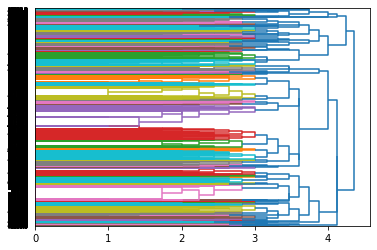

In [ ]:
#MAX
Z = hierarchy.complete(X)
dn = hierarchy.dendrogram(Z,labels=names.tolist(),orientation='right')

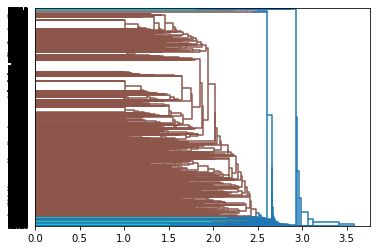

In [ ]:
#Average
Z = hierarchy.average(X)
dn = hierarchy.dendrogram(Z,labels=names.tolist(),orientation='right')

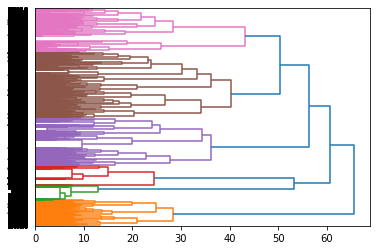

In [ ]:
#Ward
Z = hierarchy.ward(X)
dn = hierarchy.dendrogram(Z,labels=names.tolist(),orientation='right')